In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

# Define path
train_dir = r'C:\Users\priya\butterfly_dataset\train'

# Use validation_split to split data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 5225 images belonging to 75 classes.
Found 1274 images belonging to 75 classes.


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the VGG16 base model (without the top classifier)
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional base

# Add custom classifier on top
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(75, activation='softmax')  # 75 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# Save the trained model
model.save(r'C:\Users\priya\OneDrive\Documents\PROJECT3\vgg16_model.h5')

Epoch 1/10
164/164 [==============================] - 531s 3s/step - loss: 3.7632 - accuracy: 0.0838 - val_loss: 3.5255 - val_accuracy: 0.1287
Epoch 2/10
164/164 [==============================] - 542s 3s/step - loss: 3.2393 - accuracy: 0.1516 - val_loss: 3.0363 - val_accuracy: 0.2041
Epoch 3/10
164/164 [==============================] - 519s 3s/step - loss: 2.8150 - accuracy: 0.2300 - val_loss: 2.8237 - val_accuracy: 0.2457
Epoch 4/10
164/164 [==============================] - 527s 3s/step - loss: 2.4103 - accuracy: 0.3208 - val_loss: 2.4492 - val_accuracy: 0.3273
Epoch 5/10
164/164 [==============================] - 527s 3s/step - loss: 2.1158 - accuracy: 0.4013 - val_loss: 2.1448 - val_accuracy: 0.3917
Epoch 6/10
164/164 [==============================] - 530s 3s/step - loss: 1.8117 - accuracy: 0.4767 - val_loss: 1.9415 - val_accuracy: 0.4419
Epoch 7/10
164/164 [==============================] - 529s 3s/step - loss: 1.5695 - accuracy: 0.5397 - val_loss: 1.7894 - val_accuracy: 0.4961

DEBUG:h5py._conv:Creating converter from 3 to 5
INFO:root:Model loaded successfully.


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

C:\Users\priya\anaconda3\envs\tfenv39\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
return render_template('index.html')

SyntaxError: 'return' outside function (375280448.py, line 1)

In [4]:
@app.route('/')
def homepage():
    return render_template('index.html')

INFO:root:Model loaded successfully.


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

In [6]:
from flask import Flask, request, jsonify, render_template
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import logging

app = Flask(__name__)
logging.basicConfig(level=logging.INFO)

# Load model
try:
    model = load_model('vgg16_model.h5')
    logging.info("Model loaded successfully.")
except Exception as e:
    logging.error("Error loading model", exc_info=True)
    model = None

# Butterfly name mapping (as you had)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return jsonify({'error': 'Model not loaded'})

    file = request.files.get('file')
    if not file:
        return jsonify({'error': 'No file uploaded'})

    image = load_img(file, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0

    prediction = model.predict(image)
    index = np.argmax(prediction)
    return jsonify({'prediction': butterfly_names.get(index, 'Unknown')})

if __name__ == '__main__':
    app.run(debug=True)

INFO:root:Model loaded successfully.


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

In [7]:
from flask import Flask, request, jsonify, render_template
import logging
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

app = Flask(__name__)

# Configure logging
logging.basicConfig(level=logging.INFO)

# Load the trained model (not training again)
try:
    model = load_model('vgg16_model.h5')  # Ensure this file is already saved
    logging.info("Model loaded successfully.")
except Exception as e:
    logging.error("Error loading model", exc_info=True)
    model = None

# Class names mapping
butterfly_names = {
    0: 'ADONIS', 1: 'AFRICAN GIANT SWALLOWTAIL', 2: 'AMERICAN SNOOT', 3: 'ANNAKH',
    4: 'APPOLLO', 5: 'ATALA', 6: 'BANDED ORANGE HELICONIAN', 7: 'BANDED PEACOCK',
    8: 'BECKERS WHITE', 9: 'BLACK HAIRSTREAK', 10: 'BLUE MORPHO', 11: 'BLUE SPOTTED CROW',
    12: 'BROWN SIPROETA', 13: 'CABBAGE WHITE', 14: 'CAIRNS BIRDWING', 15: 'CHEQUERED SKIPPER',
    16: 'CHESTNUT', 17: 'CLEOPATRA', 18: 'CLODIUS PARNASSIAN', 19: 'CLOUDED SULPHUR',
    20: 'COMMON BANDED AWL', 21: 'COMMON WOOD-NYMPH', 22: 'COPPER TAIL', 23: 'CRESCENT',
    24: 'CRIMSON PATCH', 25: 'DANAID EGGFLY', 26: 'EASTERN COMMA', 27: 'EASTERN DAPPLE WHITE',
    28: 'EASTERN PINE ELFIN', 29: 'ELBOWED PIERROT', 30: 'GOLD BANDED', 31: 'GREAT EGGFLY',
    32: 'GREAT JAY', 33: 'GREEN CELLED CATTLEHEART', 34: 'GREY HAIRSTREAK', 35: 'INDRA SWALLOWTAIL',
    36: 'IPHICLUS SISTER', 37: 'JULIA', 38: 'LARGE MARBLE', 39: 'MALACHITE',
    40: 'MANGROVE SKIPPER', 41: 'MESTRA', 42: 'METALMARK', 43: 'MILBERTS TORTOISESHELL',
    44: 'MONARCH', 45: 'MOURNING CLOAK', 46: 'ORANGE OAKLEAF', 47: 'ORANGE TIP',
    48: 'ORCHARD SWALLOWTAIL', 49: 'PAINTED LADY', 50: 'PAPER KITE', 51: 'PEACOCK',
    52: 'PINE WHITE', 53: 'PIPEVINE SWALLOWTAIL', 54: 'POPINJAY', 55: 'PURPLE HAIRSTREAK',
    56: 'PURPLISH COPPER', 57: 'QUESTION MARK', 58: 'RED ADMIRAL', 59: 'RED CRACKER',
    60: 'RED POSTMAN', 61: 'RED SPOTTED PURPLE', 62: 'SCARCE SWALLOWTAIL', 63: 'SILVER SPOT SKIPPER',
    64: 'SLEEPY ORANGE', 65: 'SOOTYWING', 66: 'SOUTHERN DOGFACE', 67: 'STRAITED QUEEN',
    68: 'TROPICAL LEAFWING', 69: 'TWO BARRED FLASHER', 70: 'ULYSES', 71: 'VICEROY',
    72: 'WOOD SATYR', 73: 'YELLOW SWALLOWTAIL', 74: 'ZEBRA LONGWING'
}

@app.route('/')
def index():
    return render_template('index.html')  # Make sure templates/index.html exists

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return jsonify({'error': 'Model not loaded'})

    file = request.files.get('file')
    if not file:
        return jsonify({'error': 'No file uploaded'})

    try:
        image = load_img(file, target_size=(224, 224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0) / 255.0

        prediction = model.predict(image)
        index = np.argmax(prediction)
        result = butterfly_names.get(index, "Unknown")

        return jsonify({'prediction': result})
    except Exception as e:
        logging.error("Prediction error", exc_info=True)
        return jsonify({'error': 'Prediction failed'})

if __name__ == '__main__':
    app.run(debug=True)

INFO:root:Model loaded successfully.


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

In [8]:
model.save("vgg16_model.h5")

DEBUG:h5py._conv:Creating converter from 5 to 3


In [9]:
model = load_model("vgg16_model.h5")

In [ ]:
from flask import Flask, render_template, request, jsonify
import os
import logging
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

app = Flask(__name__)

# Directory to store uploaded images
target_img = os.path.join(os.getcwd(), 'static/images')
if not os.path.exists(target_img):
    os.makedirs(target_img)

# Configure logging
logging.basicConfig(level=logging.DEBUG)

# Load the model
try:
    model = load_model('vgg16_model.h5')
    logging.info("✅ Model loaded successfully.")
except Exception as e:
    logging.error("❌ Error loading model", exc_info=True)
    model = None

# Butterfly class mapping
butterfly_names = {
    0: "ADONIS", 1: "AFRICAN GIANT SWALLOWTAIL", 2: "AMERICAN SNOOT", 3: "AN 31 KH", 4: "APPOLLO",
    5: "ARIADNE", 6: "BANDED ORANGE HELICONIAN", 7: "BANDED PEACOCK", 8: "BECKERS WHITE", 9: "BLACK HAIRSTREAK",
    10: "BLUE MORPHO", 11: "BLUE SPOTTED CROW", 12: "BROWN SIPROETA", 13: "CABBAGE WHITE", 14: "CAIRNS BIRDWING",
    15: "CHECQUERED SKIPPER", 16: "CHESTNUT TIGER", 17: "CLEOPATRA", 18: "CLODIUS PARNASSIAN", 19: "CLOUDED SULPHUR",
    20: "COMMON BANDED AWL", 21: "COMMON WOOD-NYMPH", 22: "COPPER TAIL", 23: "CRESCENT", 24: "CRIMSON PATCH",
    25: "DANAID EGGFLY", 26: "EASTERN COMA", 27: "EASTERN DAPPLE WHITE", 28: "EASTERN PINE ELFIN", 29: "ELBOWED PIERROT",
    30: "GOLD BANDED", 31: "GREAT EGGFLY", 32: "GREAT JAY", 33: "GREEN CELLED CATTLEHEART", 34: "GREY HAIRSTREAK",
    35: "INDRA SWALLOW", 36: "IPHICLUS SISTER", 37: "JULIA", 38: "LARGE MARBLE", 39: "MALACHITE", 40: "MANGROVE SKIPPER",
    41: "MESTRA", 42: "METALMARK", 43: "MILBERTS TORTOISESHELL", 44: "MONARCH", 45: "MOURNING CLOAK",
    46: "ORANGE OAKLEAF", 47: "ORANGE TIP", 48: "ORCHARD SWALLOW", 49: "PAINTED LADY", 50: "PAPER KITE",
    51: "PEACOCK", 52: "PINE WHITE", 53: "PIPEVINE SWALLOW", 54: "POPINJAY", 55: "PURPLE HAIRSTREAK",
    56: "PURPLISH COPPER", 57: "QUESTION MARK", 58: "RED ADMIRAL", 59: "RED CRACKER", 60: "RED POSTMAN",
    61: "RED SPOTTED PURPLE", 62: "SCARCE SWALLOW", 63: "SILVER SPOT SKIPPER", 64: "SLEEPY ORANGE",
    65: "SOOTYWING", 66: "SOUTHERN DOGFACE", 67: "STRIPED QUEEN", 68: "TROPICAL LEAFWING",
    69: "TWO BARRED FLASHER", 70: "ULYSES", 71: "VICEROY", 72: "WOOD SATYR", 73: "YELLOW SWALLOWTAIL", 74: "ZEBRA LONG WING"
}

@app.route('/')
def main_index():
    return render_template('index.html')

@app.route('/input')
def input_page():
    return render_template('input.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        if 'image' not in request.files:
            logging.error("No file part in request")
            return jsonify({'error': 'No file part'}), 400

        file = request.files['image']
        if file.filename == '':
            logging.error("No file selected")
            return jsonify({'error': 'No selected file'}), 400

        if file:
            file_path = os.path.join(target_img, file.filename)
            file.save(file_path)
            logging.debug(f"Image saved to {file_path}")

            # Preprocess
            image = load_img(file_path, target_size=(224, 224))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0) / 255.0

            # Predict
            predictions = model.predict(image)
            predicted_class = int(np.argmax(predictions[0]))
            butterfly_name = butterfly_names.get(predicted_class, "Unknown")

            return render_template('output.html',
                                   butterfly=butterfly_name,
                                   user_image=os.path.join('static/images', file.filename))
    except Exception as e:
        logging.error("Prediction error", exc_info=True)
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

INFO:root:✅ Model loaded successfully.


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 19:41:09] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 19:41:09] "GET /static/images/butterfly1.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 19:41:09] "GET /static/images/butterfly2.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 19:41:11] "GET /input HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 19:41:11] "GET /static/images/banner.jpg HTTP/1.1" 304 -


In [2]:
from flask import Flask, render_template, request, jsonify
import os
import logging
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

app = Flask(__name__)

# Directory to store uploaded images
target_img = os.path.join(os.getcwd(), 'static/images')
if not os.path.exists(target_img):
    os.makedirs(target_img)

# Configure logging
logging.basicConfig(level=logging.DEBUG)

# Load the model
try:
    model = load_model('vgg16_model.h5')
    logging.info("✅ Model loaded successfully.")
except Exception as e:
    logging.error("❌ Error loading model", exc_info=True)
    model = None

# Butterfly class mapping
butterfly_names = {
    0: "ADONIS", 1: "AFRICAN GIANT SWALLOWTAIL", 2: "AMERICAN SNOOT", 3: "AN 31 KH", 4: "APPOLLO",
    5: "ARIADNE", 6: "BANDED ORANGE HELICONIAN", 7: "BANDED PEACOCK", 8: "BECKERS WHITE", 9: "BLACK HAIRSTREAK",
    10: "BLUE MORPHO", 11: "BLUE SPOTTED CROW", 12: "BROWN SIPROETA", 13: "CABBAGE WHITE", 14: "CAIRNS BIRDWING",
    15: "CHECQUERED SKIPPER", 16: "CHESTNUT TIGER", 17: "CLEOPATRA", 18: "CLODIUS PARNASSIAN", 19: "CLOUDED SULPHUR",
    20: "COMMON BANDED AWL", 21: "COMMON WOOD-NYMPH", 22: "COPPER TAIL", 23: "CRESCENT", 24: "CRIMSON PATCH",
    25: "DANAID EGGFLY", 26: "EASTERN COMA", 27: "EASTERN DAPPLE WHITE", 28: "EASTERN PINE ELFIN", 29: "ELBOWED PIERROT",
    30: "GOLD BANDED", 31: "GREAT EGGFLY", 32: "GREAT JAY", 33: "GREEN CELLED CATTLEHEART", 34: "GREY HAIRSTREAK",
    35: "INDRA SWALLOW", 36: "IPHICLUS SISTER", 37: "JULIA", 38: "LARGE MARBLE", 39: "MALACHITE", 40: "MANGROVE SKIPPER",
    41: "MESTRA", 42: "METALMARK", 43: "MILBERTS TORTOISESHELL", 44: "MONARCH", 45: "MOURNING CLOAK",
    46: "ORANGE OAKLEAF", 47: "ORANGE TIP", 48: "ORCHARD SWALLOW", 49: "PAINTED LADY", 50: "PAPER KITE",
    51: "PEACOCK", 52: "PINE WHITE", 53: "PIPEVINE SWALLOW", 54: "POPINJAY", 55: "PURPLE HAIRSTREAK",
    56: "PURPLISH COPPER", 57: "QUESTION MARK", 58: "RED ADMIRAL", 59: "RED CRACKER", 60: "RED POSTMAN",
    61: "RED SPOTTED PURPLE", 62: "SCARCE SWALLOW", 63: "SILVER SPOT SKIPPER", 64: "SLEEPY ORANGE",
    65: "SOOTYWING", 66: "SOUTHERN DOGFACE", 67: "STRIPED QUEEN", 68: "TROPICAL LEAFWING",
    69: "TWO BARRED FLASHER", 70: "ULYSES", 71: "VICEROY", 72: "WOOD SATYR", 73: "YELLOW SWALLOWTAIL", 74: "ZEBRA LONG WING"
}

@app.route('/')
def main_index():
    return render_template('index.html')

@app.route('/input')
def input_page():
    return render_template('input.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        if 'image' not in request.files:
            logging.error("No file part in request")
            return jsonify({'error': 'No file part'}), 400

        file = request.files['image']
        if file.filename == '':
            logging.error("No file selected")
            return jsonify({'error': 'No selected file'}), 400

        if file:
            file_path = os.path.join(target_img, file.filename)
            file.save(file_path)
            logging.debug(f"Image saved to {file_path}")

            # Preprocess
            image = load_img(file_path, target_size=(224, 224))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0) / 255.0

            # Predict
            predictions = model.predict(image)
            predicted_class = int(np.argmax(predictions[0]))
            butterfly_name = butterfly_names.get(predicted_class, "Unknown")

            return render_template('output.html',
                                   butterfly=butterfly_name,
                                   user_image=os.path.join('static/images', file.filename))
    except Exception as e:
        logging.error("Prediction error", exc_info=True)
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

DEBUG:h5py._conv:Creating converter from 3 to 5
INFO:root:✅ Model loaded successfully.


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:00] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:01] "GET /static/images/butterfly2.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:01] "GET /static/images/butterfly1.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:01] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:03] "GET /input HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:03] "GET /static/images/banner.jpg HTTP/1.1" 304 -
DEBUG:root:Image saved to C:\Users\priya\OneDrive\Documents\PROJECT3\static/images\Image_75.jpg


1/1 [==============================] - 1s 567ms/step


INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:16] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:16] "GET /static/images/banner.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 11:04:50] "GET /predict HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:10:55] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:10:55] "GET /static/images/butterfly1.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:10:55] "GET /static/images/butterfly2.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:10:58] "GET /input HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:10:58] "GET /static/images/banner.jpg HTTP/1.1" 304 -
DEBUG:root:Image saved to C:\Users\priya\OneDrive\Documents\PROJECT3\static/images\Image_86.jpg


1/1 [==============================] - 0s 230ms/step


INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:11:10] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:11:10] "GET /static/images/banner.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:11:16] "GET /input HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:11:16] "GET /static/images/banner.jpg HTTP/1.1" 304 -
DEBUG:root:Image saved to C:\Users\priya\OneDrive\Documents\PROJECT3\static/images\Image_9.jpg


1/1 [==============================] - 0s 187ms/step


INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:11:30] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 12:11:30] "GET /static/images/banner.jpg HTTP/1.1" 304 -


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 75)                9675      
                                                                 
Total params: 17,935,755
Trainable params: 3,221,067
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
history.history['accuracy'], history.history['val_accuracy']

NameError: name 'history' is not defined

In [10]:
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc * 100:.2f}%")

NameError: name 'val_data' is not defined

In [11]:
img = load_img("path_to_image.jpg", target_size=(224, 224))
img = img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = np.argmax(prediction)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_image.jpg'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1.0/255)

val_data = val_datagen.flow_from_directory(
    'butterfly_dataset/train',  # adjust path if needed
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

Found 6499 images belonging to 75 classes.


In [14]:
from tensorflow.keras.models import load_model
model = load_model('vgg16_model.h5')

In [16]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

204/204 [==============================] - 531s 3s/step - loss: 0.2795 - accuracy: 0.9346
Validation Accuracy: 93.46%


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    'butterfly_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'butterfly_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 5225 images belonging to 75 classes.
Found 1274 images belonging to 75 classes.


In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(75, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10
164/164 [==============================] - 544s 3s/step - loss: 4.0644 - accuracy: 0.0878 - val_loss: 3.2774 - val_accuracy: 0.3038
Epoch 2/10
164/164 [==============================] - 544s 3s/step - loss: 2.6711 - accuracy: 0.3948 - val_loss: 1.9915 - val_accuracy: 0.6075
Epoch 3/10
164/164 [==============================] - 770s 5s/step - loss: 1.5764 - accuracy: 0.6676 - val_loss: 1.4589 - val_accuracy: 0.6852
Epoch 4/10
164/164 [==============================] - 2013s 12s/step - loss: 1.0207 - accuracy: 0.7954 - val_loss: 1.1833 - val_accuracy: 0.7614
Epoch 5/10
164/164 [==============================] - 519s 3s/step - loss: 0.6947 - accuracy: 0.8766 - val_loss: 1.0565 - val_accuracy: 0.7669
Epoch 6/10
164/164 [==============================] - 724s 4s/step - loss: 0.4973 - accuracy: 0.9190 - val_loss: 0.9269 - val_accuracy: 0.7779
Epoch 7/10
164/164 [==============================] - 756s 5s/step - loss: 0.3617 - accuracy: 0.9479 - val_loss: 0.8656 - val_accuracy: 0.79

In [20]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

Training Accuracy: 98.87%
Validation Accuracy: 81.16%


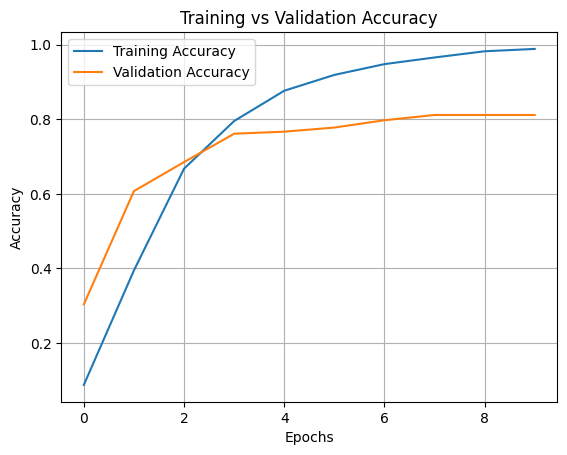

In [22]:
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from flask import Flask, render_template, request, jsonify
import os
import logging
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

app = Flask(__name__)

# Directory to store uploaded images
target_img = os.path.join(os.getcwd(), 'static/images')
if not os.path.exists(target_img):
    os.makedirs(target_img)

# Configure logging
logging.basicConfig(level=logging.DEBUG)

# Load the model
try:
    model = load_model('vgg16_model.h5')
    logging.info("✅ Model loaded successfully.")
except Exception as e:
    logging.error("❌ Error loading model", exc_info=True)
    model = None

# Butterfly class mapping
butterfly_names = {
    0: "ADONIS", 1: "AFRICAN GIANT SWALLOWTAIL", 2: "AMERICAN SNOOT", 3: "AN 31 KH", 4: "APPOLLO",
    5: "ARIADNE", 6: "BANDED ORANGE HELICONIAN", 7: "BANDED PEACOCK", 8: "BECKERS WHITE", 9: "BLACK HAIRSTREAK",
    10: "BLUE MORPHO", 11: "BLUE SPOTTED CROW", 12: "BROWN SIPROETA", 13: "CABBAGE WHITE", 14: "CAIRNS BIRDWING",
    15: "CHECQUERED SKIPPER", 16: "CHESTNUT TIGER", 17: "CLEOPATRA", 18: "CLODIUS PARNASSIAN", 19: "CLOUDED SULPHUR",
    20: "COMMON BANDED AWL", 21: "COMMON WOOD-NYMPH", 22: "COPPER TAIL", 23: "CRESCENT", 24: "CRIMSON PATCH",
    25: "DANAID EGGFLY", 26: "EASTERN COMA", 27: "EASTERN DAPPLE WHITE", 28: "EASTERN PINE ELFIN", 29: "ELBOWED PIERROT",
    30: "GOLD BANDED", 31: "GREAT EGGFLY", 32: "GREAT JAY", 33: "GREEN CELLED CATTLEHEART", 34: "GREY HAIRSTREAK",
    35: "INDRA SWALLOW", 36: "IPHICLUS SISTER", 37: "JULIA", 38: "LARGE MARBLE", 39: "MALACHITE", 40: "MANGROVE SKIPPER",
    41: "MESTRA", 42: "METALMARK", 43: "MILBERTS TORTOISESHELL", 44: "MONARCH", 45: "MOURNING CLOAK",
    46: "ORANGE OAKLEAF", 47: "ORANGE TIP", 48: "ORCHARD SWALLOW", 49: "PAINTED LADY", 50: "PAPER KITE",
    51: "PEACOCK", 52: "PINE WHITE", 53: "PIPEVINE SWALLOW", 54: "POPINJAY", 55: "PURPLE HAIRSTREAK",
    56: "PURPLISH COPPER", 57: "QUESTION MARK", 58: "RED ADMIRAL", 59: "RED CRACKER", 60: "RED POSTMAN",
    61: "RED SPOTTED PURPLE", 62: "SCARCE SWALLOW", 63: "SILVER SPOT SKIPPER", 64: "SLEEPY ORANGE",
    65: "SOOTYWING", 66: "SOUTHERN DOGFACE", 67: "STRIPED QUEEN", 68: "TROPICAL LEAFWING",
    69: "TWO BARRED FLASHER", 70: "ULYSES", 71: "VICEROY", 72: "WOOD SATYR", 73: "YELLOW SWALLOWTAIL", 74: "ZEBRA LONG WING"
}

@app.route('/')
def main_index():
    return render_template('index.html')

@app.route('/input')
def input_page():
    return render_template('input.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        if 'image' not in request.files:
            logging.error("No file part in request")
            return jsonify({'error': 'No file part'}), 400

        file = request.files['image']
        if file.filename == '':
            logging.error("No file selected")
            return jsonify({'error': 'No selected file'}), 400

        if file:
            file_path = os.path.join(target_img, file.filename)
            file.save(file_path)
            logging.debug(f"Image saved to {file_path}")

            # Preprocess
            image = load_img(file_path, target_size=(224, 224))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0) / 255.0

            # Predict
            predictions = model.predict(image)
            predicted_class = int(np.argmax(predictions[0]))
            butterfly_name = butterfly_names.get(predicted_class, "Unknown")

            return render_template('output.html',
                                   butterfly=butterfly_name,
                                   user_image=os.path.join('static/images', file.filename))
    except Exception as e:
        logging.error("Prediction error", exc_info=True)
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

INFO:root:✅ Model loaded successfully.


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:06:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:06:37] "GET /static/images/butterfly2.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:06:37] "GET /static/images/butterfly1.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:06:58] "GET /input HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:06:58] "GET /static/images/banner.jpg HTTP/1.1" 304 -
DEBUG:root:Image saved to C:\Users\priya\OneDrive\Documents\PROJECT3\static/images\Image_93.jpg


1/1 [==============================] - 0s 198ms/step


INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:07:56] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:07:56] "GET /static/images/banner.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:13:13] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:13:13] "GET /static/images/butterfly1.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:13:13] "GET /static/images/butterfly2.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:19:36] "GET /input HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:19:36] "GET /static/images/banner.jpg HTTP/1.1" 304 -
DEBUG:root:Image saved to C:\Users\priya\OneDrive\Documents\PROJECT3\static/images\Image_3.jpg


1/1 [==============================] - 0s 113ms/step


INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:19:42] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:19:42] "GET /static/images/banner.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:30:11] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:30:11] "GET /static/images/butterfly1.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:30:11] "GET /static/images/butterfly2.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:30:16] "GET /input HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:30:16] "GET /static/images/banner.jpg HTTP/1.1" 304 -
DEBUG:root:Image saved to C:\Users\priya\OneDrive\Documents\PROJECT3\static/images\Image_77.jpg


1/1 [==============================] - 0s 130ms/step


INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:30:45] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Jun/2025 15:30:45] "GET /static/images/banner.jpg HTTP/1.1" 304 -


In [1]:
!jupyter nbconvert --to script app.ipynb

[NbConvertApp] Converting notebook app.ipynb to script
[NbConvertApp] Writing 20790 bytes to app.py
